# Implementing t-SNE on MNIST data set for Digit Recognition:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loadedData = pd.read_csv('./train.csv')
print(loadedData.head())
print(loadedData.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
loadLabel = loadedData['label']
dropLabelData = loadedData.drop('label', axis=1)

print(loadLabel.shape)
print(dropLabelData.shape)

(42000,)
(42000, 784)


In [3]:
from sklearn.preprocessing import StandardScaler

standardizedData = StandardScaler().fit_transform(dropLabelData)
print(standardizedData.shape)

(42000, 784)


In [4]:
sdata = standardizedData

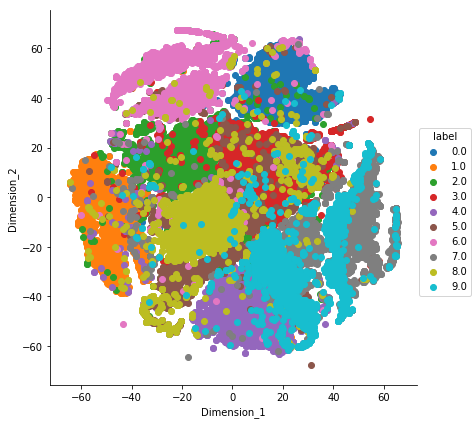

In [5]:
import seaborn as sn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
tsneData = model.fit_transform(sdata)

tsneData = np.vstack((tsneData.T, loadLabel)).T
tsneDataframe = pd.DataFrame(data=tsneData, columns=("Dimension_1", "Dimension_2", "label"))

sn.FacetGrid(tsneDataframe, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.show()

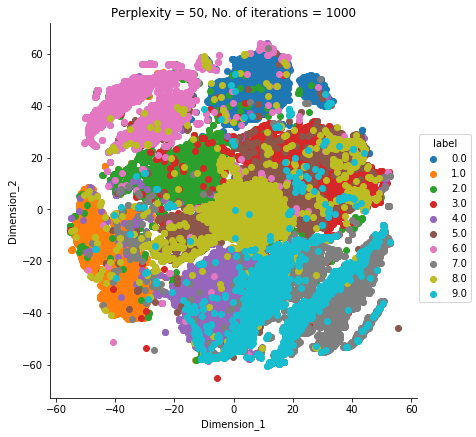

In [7]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=1000)
tsneData = model.fit_transform(sdata) 

tsneData = np.vstack((tsneData.T, loadLabel)).T
tsneDataframe = pd.DataFrame(data=tsneData, columns=("Dimension_1", "Dimension_2", "label"))

sn.FacetGrid(tsneDataframe, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('Perplexity = 50, No. of iterations = 1000')
plt.show()